# **Informe General**
El propósito del script es cargar y explorar un dataset de compañías del índice S&P 500 almacenado en Google Drive. Se centra en realizar una exploración inicial de datos (EDA), obteniendo información general, estadísticas y valores nulos para comprender mejor la estructura del archivo.


# **COMPAÑIAS**

In [36]:
# 1. Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Definir el path del archivo
file_path1 = "/content/drive/MyDrive/BOOTCAMP/sp500_companies.csv"

# 4. Leer CSVs
df1 = pd.read_csv(file_path1)  # Compañías

# 5. Configuración de visualizacion de pandas
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')

# 6. Vista rápida
# print("\n🔹 Dataset 1: Compañías")
# display(df1.head(10))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 📊 Análisis descriptivo del dataset

Antes de entrar en métricas financieras avanzadas, es importante realizar un **análisis exploratorio básico** para entender la estructura de los datos.  

## 🔹 Dimensiones del dataset
- Número de **filas**: corresponde a la cantidad de compañías incluidas en el dataset.  
- Número de **columnas**: indica cuántas variables financieras o de identificación tiene cada compañía.  

Este paso nos ayuda a tener una visión inicial de la **cobertura y amplitud de la información** disponible.  

## 🔹 Información general (`df1.info()`)
- Tipo de datos de cada columna (números, texto, fechas, etc.).  
- Cantidad de valores no nulos por columna.  
- Nos permite identificar rápidamente posibles problemas de calidad de datos.  

## 🔹 Estadísticas descriptivas (`df1.describe()`)
Muestra estadísticas básicas de las variables numéricas, como:  
- **Media** y **mediana** → tendencia central.  
- **Mínimo** y **máximo** → rango de valores.  
- **Desviación estándar** → nivel de dispersión o variabilidad.  

## 🔹 Distribución sectorial
Un análisis clave consiste en revisar **cuántas empresas hay en cada sector**.  
Esto nos da una idea de la **composición del índice** y de cuáles industrias tienen mayor representación en el S&P 500.  

Este análisis descriptivo funciona como **punto de partida** para el resto del informe financiero, ya que sienta las bases para entender mejor los resultados posteriores.


In [37]:
print("\n Información general:")
print(df1.info())

print("\n Estadísticas descriptivas:")
display(df1.describe())


 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             502 non-null    object 
 1   Symbol               502 non-null    object 
 2   Shortname            502 non-null    object 
 3   Longname             502 non-null    object 
 4   Sector               502 non-null    object 
 5   Industry             502 non-null    object 
 6   Currentprice         502 non-null    float64
 7   Marketcap            502 non-null    int64  
 8   Ebitda               473 non-null    float64
 9   Revenuegrowth        499 non-null    float64
 10  City                 502 non-null    object 
 11  State                482 non-null    object 
 12  Country              502 non-null    object 
 13  Fulltimeemployees    493 non-null    float64
 14  Longbusinesssummary  502 non-null    object 
 15  Weight           

,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight
count,502.000000,5.020000e+02,4.730000e+02,499.000000,4.930000e+02,502.000000
mean,217.893685,1.107222e+11,7.045286e+09,0.070541,5.782761e+04,0.001992
std,489.205027,3.440074e+11,1.624213e+10,0.180247,1.395988e+05,0.006189
min,9.400000,4.664099e+09,-3.991000e+09,-0.602000,2.800000e+01,0.000084
25%,68.547500,1.933417e+10,1.625000e+09,0.002000,1.020000e+04,0.000348
50%,118.365000,3.706396e+10,2.952748e+09,0.051000,2.169000e+04,0.000667
75%,227.667500,7.830565e+10,6.020000e+09,0.109000,5.510000e+04,0.001409
max,8276.780000,3.846820e+12,1.495470e+11,1.632000,2.100000e+06,0.069209


# 📑 Estadísticas del DataFrame de Compañías

En esta sección se realiza un análisis más detallado del **dataset de compañías (df1)**, desglosado en varias dimensiones:

## 🔹 Información general
Con `df1.info()` revisamos:
- Número de registros y columnas.  
- Tipos de datos (numéricos, texto, fechas, etc.).  
- Cantidad de valores no nulos en cada columna.  

Esto nos permite tener una visión rápida de la **estructura del dataset**.

## 🔹 Estadísticas numéricas
Con `df1.describe()` obtenemos:
- Medidas de tendencia central (media, mediana).  
- Medidas de dispersión (desviación estándar, rango).  
- Valores extremos (mínimo y máximo).  

Este análisis ayuda a entender la **distribución y escala de las variables financieras** como *Market Cap*, *EBITDA*, *Current Price*, entre otras.

## 🔹 Estadísticas categóricas
Con `df1.describe(include=['object'])` analizamos:
- Columnas de tipo categórico (ejemplo: *Sector*, *Industry*, *Country*).  
- Número de valores únicos.  
- Frecuencia de aparición de cada categoría.  

Esto permite identificar la **diversidad y concentración** en los sectores o industrias representadas.

## 🔹 Valores nulos
Finalmente, se cuentan los **valores faltantes por columna** con `df1.isnull().sum()`.  
Esto es esencial para detectar posibles problemas de **calidad de datos** antes de aplicar cálculos financieros o generar visualizaciones.

---

Este análisis integral del DataFrame es el **punto de partida** para cualquier informe financiero, ya que asegura que la información


In [38]:
# 7. Estadísticas por DataFrame

# ---- Dataset 1:
print("\n🔹 Información general (df1 - Compañías):")
print(df1.info())

print("\n Estadísticas numéricas (df1 - Compañías):")
display(df1.describe().T)

print("\n Estadísticas categóricas (df1 - Compañías):")
display(df1.describe(include=['object']).T)

print("\n Valores nulos (df1 - Compañías):")
print(df1.isnull().sum())



🔹 Información general (df1 - Compañías):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             502 non-null    object 
 1   Symbol               502 non-null    object 
 2   Shortname            502 non-null    object 
 3   Longname             502 non-null    object 
 4   Sector               502 non-null    object 
 5   Industry             502 non-null    object 
 6   Currentprice         502 non-null    float64
 7   Marketcap            502 non-null    int64  
 8   Ebitda               473 non-null    float64
 9   Revenuegrowth        499 non-null    float64
 10  City                 502 non-null    object 
 11  State                482 non-null    object 
 12  Country              502 non-null    object 
 13  Fulltimeemployees    493 non-null    float64
 14  Longbusinesssummary  502 non-null    object 
 15

,count,mean,std,min,25%,50%,75%,max
Currentprice,502.0,2.178937e+02,4.892050e+02,9.400000e+00,6.854750e+01,1.183650e+02,2.276675e+02,8.276780e+03
Marketcap,502.0,1.107222e+11,3.440074e+11,4.664099e+09,1.933417e+10,3.706396e+10,7.830565e+10,3.846820e+12
Ebitda,473.0,7.045286e+09,1.624213e+10,-3.991000e+09,1.625000e+09,2.952748e+09,6.020000e+09,1.495470e+11
Revenuegrowth,499.0,7.054108e-02,1.802470e-01,-6.020000e-01,2.000000e-03,5.100000e-02,1.090000e-01,1.632000e+00
Fulltimeemployees,493.0,5.782761e+04,1.395988e+05,2.800000e+01,1.020000e+04,2.169000e+04,5.510000e+04,2.100000e+06
Weight,502.0,1.992032e-03,6.189128e-03,8.391304e-05,3.478462e-04,6.668275e-04,1.408818e-03,6.920915e-02



 Estadísticas categóricas (df1 - Compañías):


,count,unique,top,freq
Exchange,502,4,NYQ,348
Symbol,502,502,AMTM,1
Shortname,502,499,Fox Corporation,2
Longname,502,499,Fox Corporation,2
Sector,502,11,Technology,82
Industry,502,114,Utilities - Regulated Electric,23
City,502,235,New York,38
State,482,41,CA,67
Country,502,8,United States,481
Longbusinesssummary,502,499,"Fox Corporation operates as a news, sports, an...",2



 Valores nulos (df1 - Compañías):
Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 29
Revenuegrowth           3
City                    0
State                  20
Country                 0
Fulltimeemployees       9
Longbusinesssummary     0
Weight                  0
dtype: int64


# 📊 Distribución de compañías por sector

En este análisis mostramos cómo se distribuyen las empresas del S&P 500 en los distintos **sectores económicos**.  
Esto nos ayuda a entender la **composición del índice**, identificando cuáles sectores tienen mayor presencia y, por lo tanto, más peso en el mercado.  

- Un **sector con más compañías** implica mayor diversificación y representación en el índice.  
- Sectores más pequeños, aunque menos representados, pueden tener **empresas clave** que influyen fuertemente en la economía.  
- Visualizar la distribución también permite comparar la importancia relativa de industrias como **Tecnología, Finanzas, Salud o Energía** dentro del mercado bursátil.  

Esta gráfica es muy útil como **primer paso exploratorio** antes de profundizar en el análisis financiero por empresa.


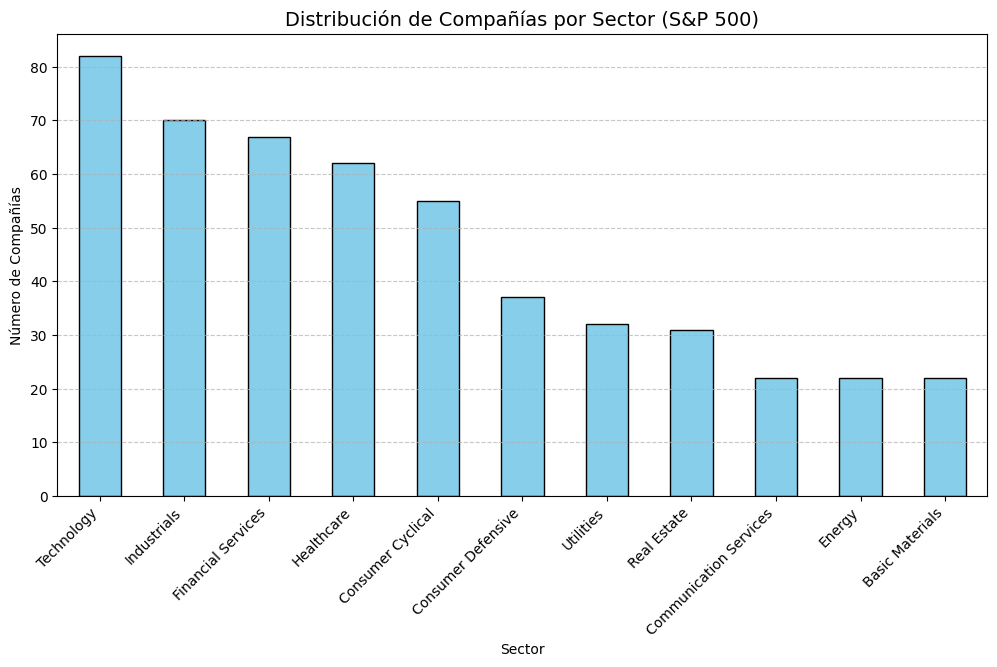

In [39]:
if "Sector" in df1.columns:
    sector_counts = df1["Sector"].value_counts()

    plt.figure(figsize=(12,6))
    sector_counts.plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title("Distribución de Compañías por Sector (S&P 500)", fontsize=14)
    plt.xlabel("Sector")
    plt.ylabel("Número de Compañías")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
else:
    print(" No se encontró la columna 'Sector' en el dataset.")

# 💰 Empresas con mayor EBITDA

En este apartado se muestran las **10 compañías del S&P 500 con el mayor EBITDA**  
(*Earnings Before Interest, Taxes, Depreciation, and Amortization* o  
**Beneficio antes de intereses, impuestos, depreciación y amortización**).  

El **EBITDA** es un indicador financiero clave que mide la **rentabilidad operativa** de una empresa, ya que refleja su capacidad de generar beneficios a partir de sus operaciones principales, sin tener en cuenta factores financieros o contables.  

- Un **EBITDA alto** puede indicar una compañía con operaciones sólidas, márgenes fuertes y buena eficiencia en su negocio.  
- También permite comparar empresas de diferentes sectores de manera más homogénea, porque elimina distorsiones relacionadas con impuestos o estructuras de capital.  
- Esta métrica es utilizada con frecuencia en **valoraciones de empresas** y en el análisis de su capacidad para generar **flujo de caja operativo**.  

En la gráfica, las barras horizontales muestran de manera clara cuáles son las compañías líderes en términos de EBITDA dentro del índice.


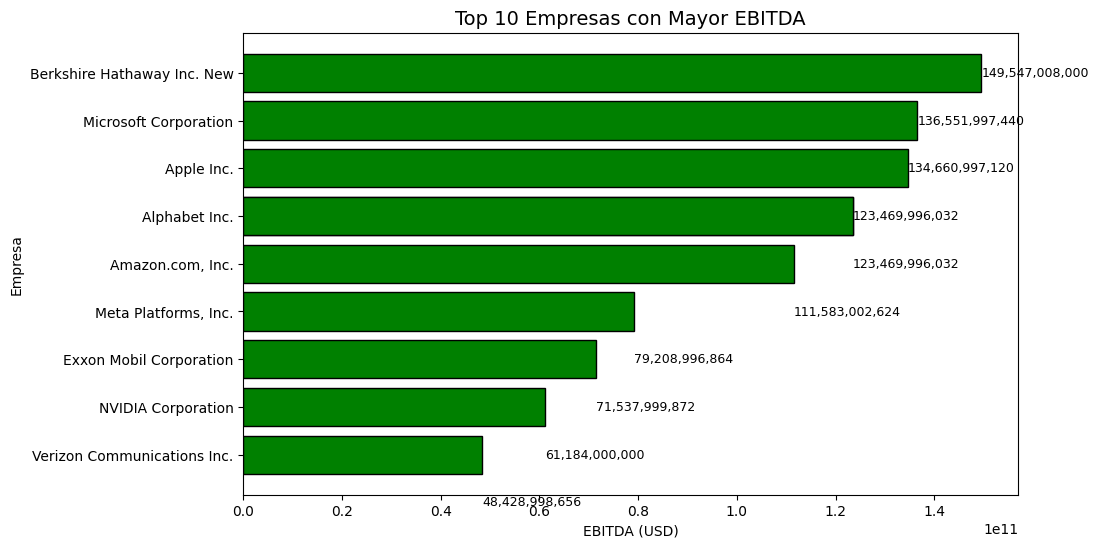

In [40]:
# 2. Empresas con mayor EBITDA
if "Ebitda" in df1.columns and "Shortname" in df1.columns:
    top_ebitda = df1.sort_values(by="Ebitda", ascending=False).head(10)

    plt.figure(figsize=(10,6))
    plt.barh(top_ebitda["Shortname"], top_ebitda["Ebitda"], color="green", edgecolor="black")
    plt.gca().invert_yaxis()
    plt.title("Top 10 Empresas con Mayor EBITDA", fontsize=14)
    plt.xlabel("EBITDA (USD)")
    plt.ylabel("Empresa")
    # Añadir valores en las barras
    for i, v in enumerate(top_ebitda["Ebitda"]):
        plt.text(v, i, f"{v:,.0f}", va="center", ha="left", fontsize=9)
    plt.show()
else:
    print(" No se encontró la columna 'Ebitda' o 'Shortname' en el dataset.")

# 🏦 Empresas con mayor capitalización de mercado

En este análisis se presentan las **10 compañías del S&P 500 con mayor capitalización de mercado**  
(*Market Capitalization* o **valor de mercado**).  

La **capitalización bursátil** se calcula como el **precio de la acción multiplicado por el número total de acciones en circulación**.  
Es uno de los indicadores más importantes para medir el **tamaño relativo de una empresa en el mercado**.  

- **Empresas con alta capitalización** (Mega Caps) suelen ser líderes en sus sectores, más estables y con menor riesgo relativo.  
- **Empresas de capitalización mediana o baja** pueden ser más volátiles, pero también ofrecen mayores oportunidades de crecimiento.  
- El ranking de las más grandes nos permite identificar qué compañías dominan el mercado y concentran la mayor parte del valor dentro del índice.  

La gráfica de barras horizontales muestra claramente cuáles son las corporaciones con mayor peso económico en el S&P 500.


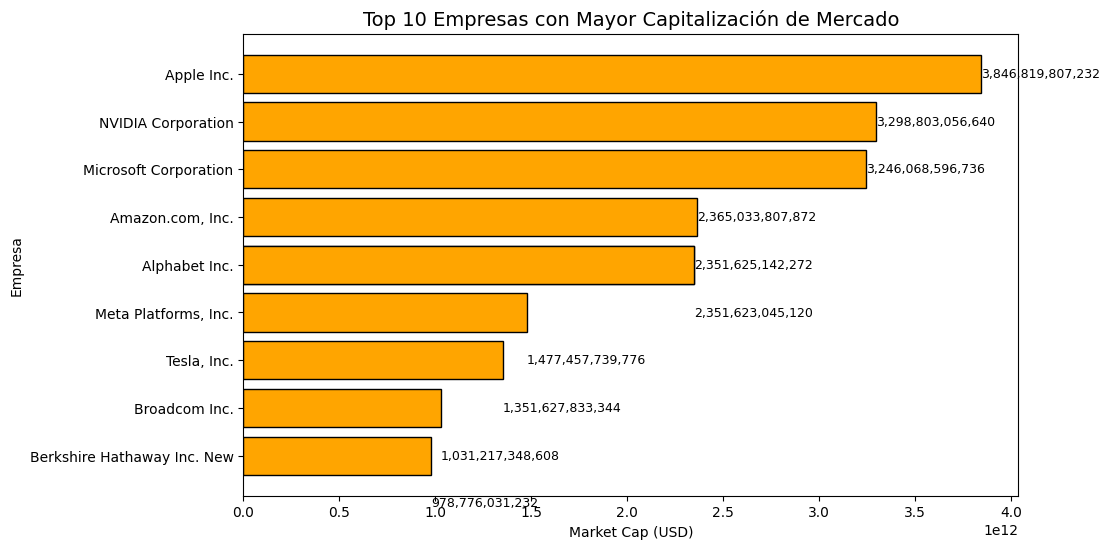

In [41]:
# 3. Empresas con mayor capitalización de mercado

if "Marketcap" in df1.columns and "Shortname" in df1.columns:
    top_marketcap = df1.sort_values(by="Marketcap", ascending=False).head(10)

    plt.figure(figsize=(10,6))
    plt.barh(top_marketcap["Shortname"], top_marketcap["Marketcap"], color="orange", edgecolor="black")
    plt.gca().invert_yaxis()
    plt.title("Top 10 Empresas con Mayor Capitalización de Mercado", fontsize=14)
    plt.xlabel("Market Cap (USD)")
    plt.ylabel("Empresa")
    # Añadir valores en las barras
    for i, v in enumerate(top_marketcap["Marketcap"]):
        plt.text(v, i, f"{v:,.0f}", va="center", ha="left", fontsize=9)
    plt.show()
else:
    print(" No se encontró la columna 'Marketcap' o 'Shortname' en el dataset.")

# 🧹 Detección y visualización de valores nulos

En esta sección analizamos los **valores nulos (NaN)** del dataset.  
Los valores nulos representan datos faltantes que pueden afectar la calidad del análisis financiero.  

## ✅ Importancia del análisis de nulos
- Los **valores faltantes** pueden distorsionar métricas como promedios, crecimientos o ratios financieros.  
- Detectarlos permite definir estrategias: **eliminación, imputación (media, mediana, 0) o sustitución por datos externos**.  
- Mantener un dataset limpio es clave para obtener resultados **confiables y precisos**.  

## 📊 Tabla de valores nulos
El conteo de nulos por columna nos da una visión general de dónde falta información y su magnitud.

## 🔎 Heatmap de valores nulos
Para complementar el conteo, se incluye un **mapa de calor** que muestra gráficamente la distribución de los datos faltantes:
- Cada columna representa una variable del dataset.  
- Las celdas **claras** indican valores nulos.  
- Las celdas **oscuras** representan datos completos.  

👉 Esta combinación de **tabla + heatmap** permite una inspección rápida y detallada de la calidad de los datos antes de continuar con el análisis financiero.



🔹 Valores nulos por columna:
Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 29
Revenuegrowth           3
City                    0
State                  20
Country                 0
Fulltimeemployees       9
Longbusinesssummary     0
Weight                  0
dtype: int64


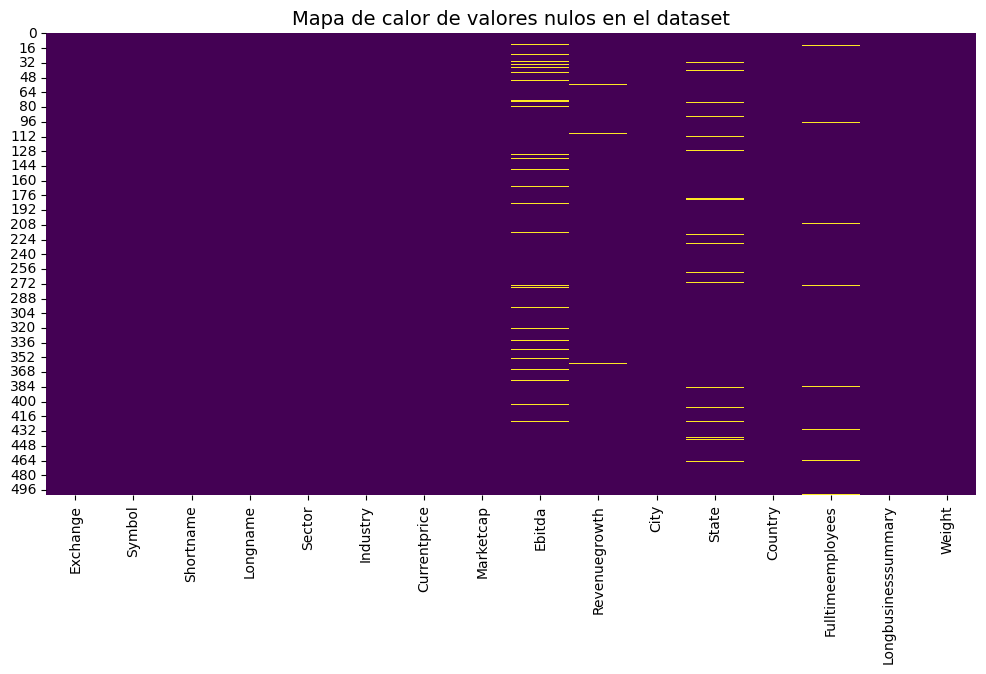

In [42]:

# 4. Valores nulos
print("\n🔹 Valores nulos por columna:")
print(df1.isnull().sum())
# Heatmap de valores nulos

plt.figure(figsize=(12,6))
sns.heatmap(df1.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de calor de valores nulos en el dataset", fontsize=14)
plt.show()



# **INDICES**

Importamos la carpeta de datos

In [43]:
# 1. Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Importar librerías
import pandas as pd
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# 3. Definir el path del archivo
file_path2 = "/content/drive/MyDrive/BOOTCAMP/sp500_index.csv"

# 4. Leer CSVs
df2 = pd.read_csv(file_path2)  # Índice

# 📑 Importancia de la visualización inicial del índice S&P500

En un informe financiero, resulta clave presentar una **vista numérica preliminar** de los datos antes de realizar análisis complejos o representaciones gráficas.  

La muestra inicial del dataset del **Índice S&P500** cumple varios propósitos:  
- Proporciona una **validación del contenido**, asegurando que la información cargada corresponde al índice esperado.  
- Permite observar de manera directa los **primeros valores registrados**, lo que da confianza sobre la calidad y consistencia del dataset.  
- Facilita un **punto de partida numérico** para que los analistas comprendan el contexto de las series históricas antes de profundizar en métricas o visualizaciones.  

Incluir esta vista rápida en el informe aporta **transparencia y trazabilidad**, ya que permite verificar que las conclusiones posteriores se basan en datos reales y correctamente estructurados.



In [45]:
# 5. Configuración de visualizacion de pandas
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')

# 6. Vista rápida
print("\n Dataset 2: Índice S&P500")
display(df2.head(10))




 Dataset 2: Índice S&P500


,Date,S&P500
0,2014-12-22,2078.54
1,2014-12-23,2082.17
2,2014-12-24,2081.88
3,2014-12-26,2088.77
4,2014-12-29,2090.57
5,2014-12-30,2080.35
6,2014-12-31,2058.90
7,2015-01-02,2058.20
8,2015-01-05,2020.58
9,2015-01-06,2002.61


# 📈 Evolución histórica del S&P500

El análisis de la evolución histórica del **índice S&P500** es uno de los pilares fundamentales de cualquier informe financiero.  

## 🔹 Importancia de mostrar la serie histórica
- Permite observar la **tendencia general del mercado** a lo largo del tiempo.  
- Facilita la identificación de **ciclos económicos**, periodos de crecimiento sostenido o caídas pronunciadas.  
- Ayuda a evaluar la **resiliencia del índice** frente a crisis económicas y su capacidad de recuperación.  
- Sirve como referencia clave para comparar el desempeño de empresas individuales frente al comportamiento del mercado en su conjunto.  


Incluir la evolución histórica del S&P500 en el informe permite **conectar el análisis micro (empresas)** con la **visión macro del mercado**, ofreciendo una perspectiva integral.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


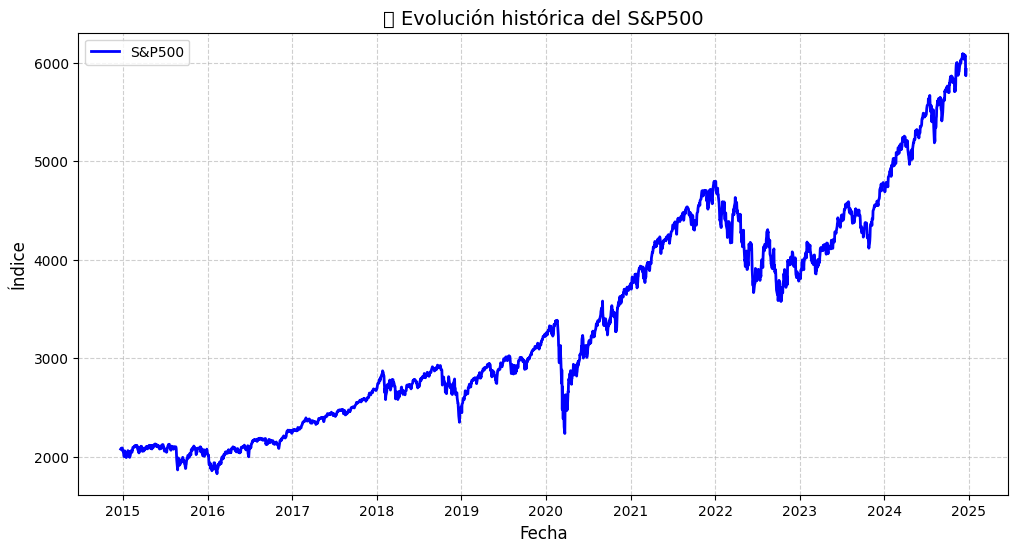

In [46]:
# Asegurar que la primera columna sea fecha
df2.iloc[:,0] = pd.to_datetime(df2.iloc[:,0])

# Ordenar por fecha por seguridad
df2 = df2.sort_values(df2.columns[0])

# Graficar
plt.figure(figsize=(12,6))
plt.plot(df2.iloc[:,0], df2.iloc[:,1], label="S&P500", color="blue", linewidth=2)

# Estética
plt.title("📈 Evolución histórica del S&P500", fontsize=14)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Índice", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

# **STOCKS**

In [47]:
# 1. Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Importar librerías
import pandas as pd

# 3. Definir el path del archivo
file_path3 = "/content/drive/MyDrive/BOOTCAMP/sp500_stocks.csv"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# 4. Leer CSVs
df3 = pd.read_csv(file_path3)  # Stocks

# 5. Configuración de visualizacion de pandas
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')


# 📊 Top 5 empresas por volumen promedio

El volumen de negociación representa la **cantidad de acciones transadas en el mercado** durante un periodo de tiempo.  
Analizar este indicador es fundamental porque refleja el **nivel de liquidez e interés de los inversionistas** en una acción.  

## 🔹 Importancia del análisis
- Un **alto volumen promedio** indica que la acción es **altamente líquida**, lo cual facilita la compra y venta sin generar grandes variaciones en el precio.  
- El volumen también puede interpretarse como una medida de la **confianza y relevancia de la empresa** dentro del mercado.  
- Identificar las compañías con mayor volumen permite destacar aquellas que tienen **mayor actividad bursátil** y, por tanto, un impacto más fuerte en la dinámica del índice.  

## 🔹 Valor en el informe
Mostrar el **Top 5 de empresas por volumen promedio** ofrece:
- Una visión clara de cuáles son las compañías más negociadas.  
- Contexto adicional para interpretar las fluctuaciones de precios y rendimientos.  
- Un punto de partida para comparar si el volumen está relacionado con la **volatilidad, la capitalización de mercado o el desempeño financiero** de esas empresas.  

Este ranking permite identificar a las acciones más activas y relevantes desde la perspectiva del mercado.


In [49]:
# 1. Top 5 por volumen promedio
top5_symbols = df3.groupby("Symbol")["Volume"].mean().nlargest(5).index.tolist()
df_top5 = df3[df3["Symbol"].isin(top5_symbols)]

print("📊 Top 5 empresas por volumen promedio:")
print(top5_symbols)

📊 Top 5 empresas por volumen promedio:
['NVDA', 'TSLA', 'AMZN', 'GOOG', 'T']


# 📈 Evolución histórica del precio ajustado (Top 5)

El **precio ajustado** de una acción refleja su valor considerando **dividendos, splits y otros eventos corporativos** que afectan el precio real de mercado.  
Analizar su evolución histórica es clave para entender el **comportamiento bursátil real** de las compañías.  

## 🔹 Importancia del análisis
- Permite observar la **tendencia de largo plazo** de cada empresa.  
- Facilita la comparación del desempeño relativo entre las compañías con mayor volumen de negociación.  
- Muestra cómo diferentes eventos del mercado (crisis, expansiones, cambios sectoriales) afectan de forma distinta a cada acción.  
- Ayuda a detectar **patrones de crecimiento o caídas sostenidas**.  

## 🔹 Valor en el informe
Incluir esta gráfica en el informe permite:
- Visualizar de forma clara las **trayectorias de las acciones más líquidas**.  
- Entregar una referencia histórica para contrastar con métricas posteriores como **rendimiento acumulado, volatilidad o correlación con el índice S&P500**.  
- Proveer un insumo esencial para analistas e inversionistas en la toma de decisiones estratégicas.  

Esta comparación gráfica muestra cómo han evolucionado, en paralelo, las principales acciones del mercado en términos de liquidez y relevancia.


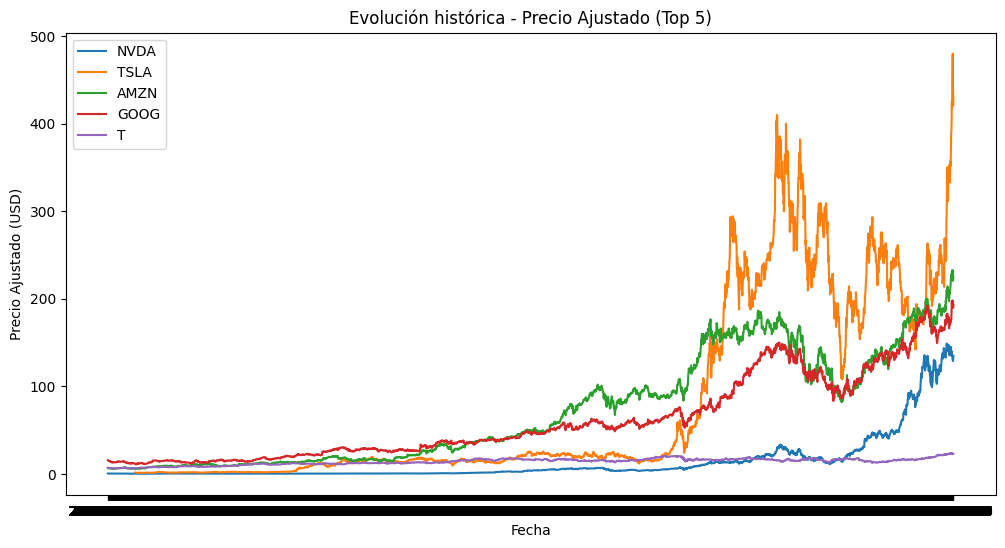

In [50]:
# 2. Evolución histórica del precio ajustado
plt.figure(figsize=(12,6))
for sym in top5_symbols:
    sym_data = df_top5[df_top5["Symbol"] == sym]
    plt.plot(sym_data["Date"], sym_data["Adj Close"], label=sym)

plt.title("Evolución histórica - Precio Ajustado (Top 5)")
plt.xlabel("Fecha")
plt.ylabel("Precio Ajustado (USD)")
plt.legend()
plt.show()

# 📊 Volumen de transacciones (Top 5)

El volumen de transacciones refleja la cantidad de acciones negociadas en el mercado y se asocia directamente con la **liquidez y el interés de los inversionistas**.  
Al observar su evolución en el tiempo, es posible identificar periodos de mayor actividad bursátil que suelen coincidir con momentos de alta volatilidad o anuncios relevantes en cada compañía.  

Comparar el volumen de las cinco empresas más negociadas permite reconocer cuáles concentran la atención del mercado y cómo varía su nivel de participación a lo largo del tiempo.  
Un aumento repentino en el volumen puede anticipar cambios significativos en el precio, mientras que un comportamiento estable sugiere una negociación más consistente.  

Esta gráfica ofrece una visión clara de la **dinámica de negociación** de las acciones más activas, aportando contexto para comprender mejor su comportamiento histórico y su relevancia dentro del S&P500.


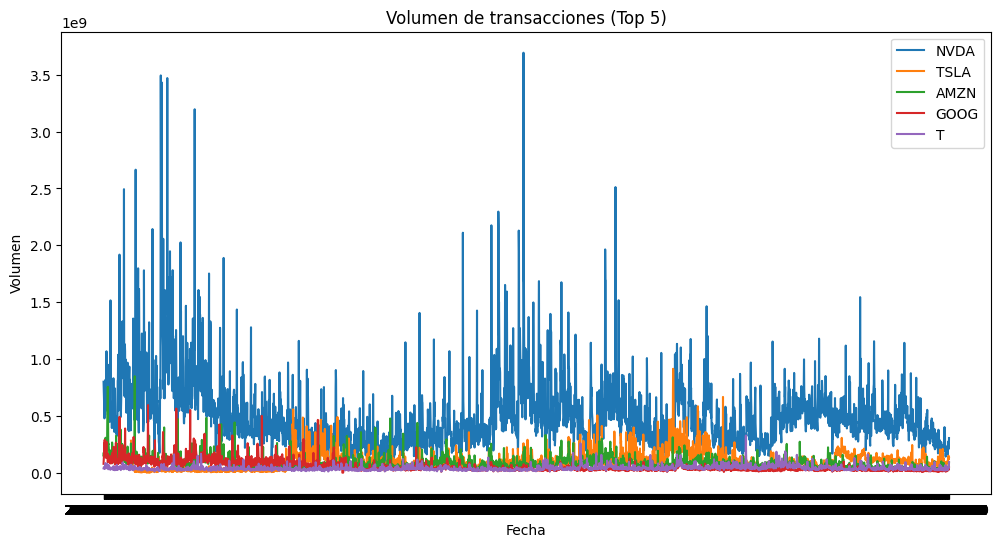

In [51]:
# 3. Volumen de transacciones
plt.figure(figsize=(12,6))
for sym in top5_symbols:
    sym_data = df_top5[df_top5["Symbol"] == sym]
    plt.plot(sym_data["Date"], sym_data["Volume"], label=sym)

plt.title("Volumen de transacciones (Top 5)")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.legend()
plt.show()


# 📈 Rendimiento acumulado (Top 5)

El rendimiento acumulado muestra cómo habría evolucionado una inversión de 1 USD en cada compañía a lo largo del tiempo.  
Este indicador permite comparar de manera directa el desempeño de las cinco acciones más negociadas y ver cuáles han generado un crecimiento sostenido y cuáles han sido más volátiles.  

La curva de cada empresa resume tanto las subidas como las caídas de su precio ajustado, ofreciendo una visión clara de la rentabilidad relativa entre ellas.  
Al observar estas trayectorias, se pueden identificar periodos en los que unas compañías superaron al resto, así como momentos en los que el mercado en general influyó de forma uniforme en todas.  

Esta visualización complementa el análisis de precios y volúmenes, mostrando de manera intuitiva qué acciones han sido más rentables a lo largo del tiempo y cómo se han comportado frente a sus pares en el S&P500.


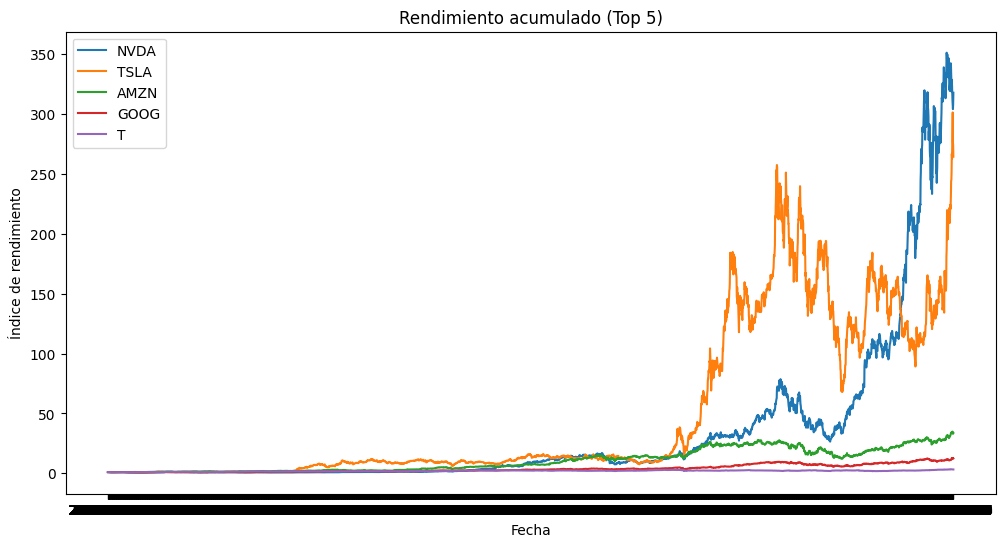

In [52]:
# 4. Rendimiento acumulado
plt.figure(figsize=(12,6))
for sym in top5_symbols:
    sym_data = df_top5[df_top5["Symbol"] == sym].sort_values("Date")
    sym_data["Rendimiento"] = sym_data["Adj Close"].pct_change()
    sym_data["Rend_acumulado"] = (1 + sym_data["Rendimiento"]).cumprod()
    plt.plot(sym_data["Date"], sym_data["Rend_acumulado"], label=sym)

plt.title("Rendimiento acumulado (Top 5)")
plt.xlabel("Fecha")
plt.ylabel("Índice de rendimiento")
plt.legend()
plt.show()

# 📌 Volatilidad anualizada (Top 5)

La volatilidad anualizada mide la intensidad de las variaciones en el precio de una acción, expresada en términos anuales.  
Un valor más alto refleja un comportamiento más inestable y riesgoso, mientras que uno más bajo indica movimientos más predecibles y estables en el tiempo.  

Comparar la volatilidad de las cinco acciones más negociadas permite identificar cuáles presentan un perfil más conservador y cuáles implican mayor riesgo para los inversionistas.  
Este indicador es clave al momento de diseñar estrategias de inversión, ya que no solo importa la rentabilidad acumulada, sino también la **consistencia y estabilidad de los retornos**.  

En conjunto con los análisis previos de precios, volumen y rendimiento, la volatilidad completa el panorama del riesgo asociado a cada una de las empresas destacadas del S&P500.


In [53]:
#  5. Volatilidad anualizada

volatilidad = {}
for sym in top5_symbols:
    sym_data = df_top5[df_top5["Symbol"] == sym].copy()  # ← Aquí el cambio
    sym_data["Rendimiento"] = sym_data["Adj Close"].pct_change()
    vol = sym_data["Rendimiento"].std() * (252**0.5)
    volatilidad[sym] = vol

print("\n📌 Volatilidad anualizada de cada acción:")
print(pd.Series(volatilidad).sort_values(ascending=False))


📌 Volatilidad anualizada de cada acción:
TSLA    0.573582
NVDA    0.454567
AMZN    0.327402
GOOG    0.273623
T       0.205600
dtype: float64
